In [197]:
import warnings
warnings.filterwarnings('ignore')

In [198]:
import pandas as pd

In [199]:
DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15009 non-null  object 
 1   meanPriceEach  15009 non-null  float64
 2   totalOrder     15009 non-null  float64
 3   orderType_1    15009 non-null  float64
 4   orderType_2    15009 non-null  float64
 5   orderType_3    15009 non-null  float64
 6   totalBundle    15009 non-null  float64
 7   bundleType_1   15009 non-null  float64
 8   bundleType_2   15009 non-null  float64
 9   customerType   15009 non-null  object 
 10  FY             15009 non-null  int64  
 11  Country        15009 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.4+ MB


In [200]:
DF.head()

,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25
3,2015-01-11,1.52,65483.08,14570.74,30445.75,3170.11,17296.48,16715.45,581.03,Online,2015,25
4,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,12492.18,10971.43,1520.75,Online,2015,25


# 탐색적데이터 분석 및 시각화

In [201]:
DF.customerType.value_counts()

Offline    7506
Online     7503
Name: customerType, dtype: int64

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns


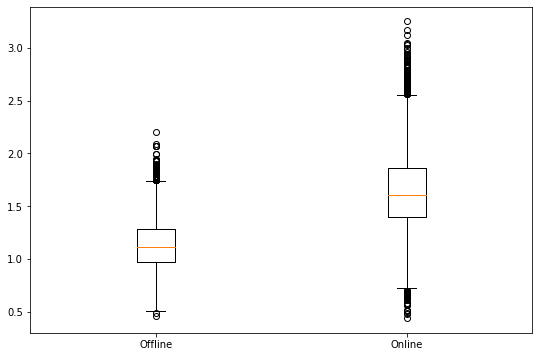

In [203]:
plt.figure(figsize=(9,6))
plt.boxplot([DF[DF.customerType == 'Offline'].meanPriceEach,
            DF[DF.customerType == 'Online'].meanPriceEach],
            labels = ['Offline', 'Online'])
plt.show()


In [239]:
DF1 = DF[['meanPriceEach', 'totalOrder', 'totalBundle','customerType']]
DF1.head(3)

,meanPriceEach,totalOrder,totalBundle,customerType
0,1.56,58065.35,19114.43,Online
1,1.10,2578275.12,510468.50,Offline
2,1.17,2335986.11,551745.27,Offline


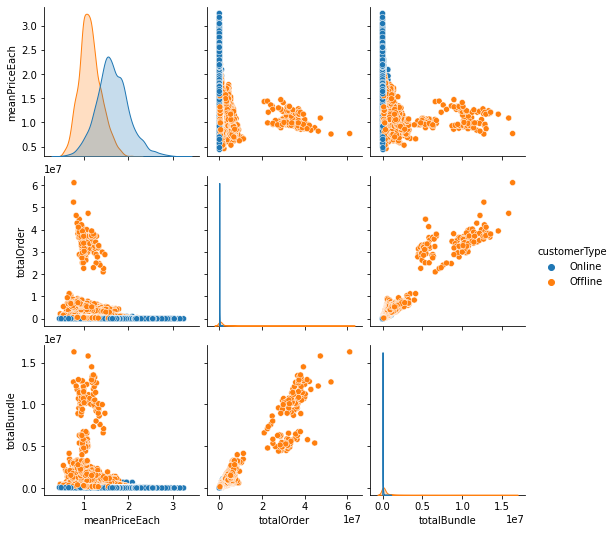

In [240]:
sns.pairplot(hue = 'customerType', data = DF1)
plt.show()

# Train & Test Split

In [207]:
from sklearn.model_selection import train_test_split

In [241]:
X = DF[['meanPriceEach', 'totalOrder', 'totalBundle']]
y = DF['customerType']

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

In [243]:
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (10506, 3) (10506,)
Test Data :  (4503, 3) (4503,)


# DecisionTreeClassifier 수행

In [245]:
from sklearn.tree import DecisionTreeClassifier

In [281]:
Model_pr = DecisionTreeClassifier(max_depth = 4, random_state= 2045)
Model_pr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

In [282]:
from sklearn.tree import export_graphviz
import graphviz

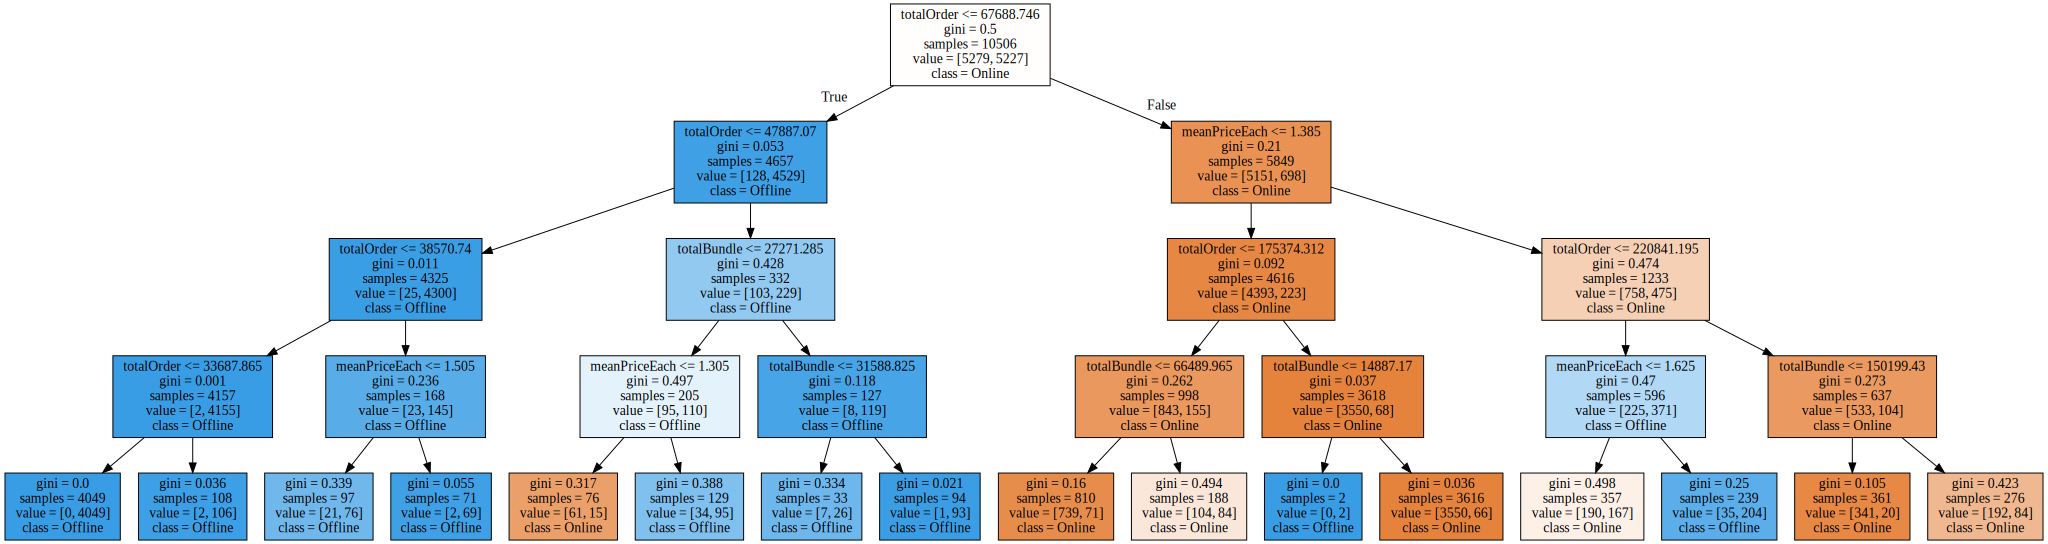

In [283]:
graphviz.Source(export_graphviz(Model_pr,
                                class_names = (['Online', 'Offline']),
                                feature_names = (['meanPriceEach', 'totalOrder', 'totalBundle']),
                                filled = True))

# Model Evaluate

In [249]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [250]:
y_hat = Model_pr.predict(X_test)

In [251]:
print(confusion_matrix(y_test, y_hat))

[[2055  172]
 [ 137 2139]]


In [252]:
print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, average = None))
print(recall_score(y_test, y_hat, average = None))

0.9313790806129247
[0.9375     0.92557334]
[0.92276605 0.93980668]


In [253]:
f1_score(y_test, y_hat, average = None)

array([0.93007468, 0.93263571])

# Modeling - Logistic Regression

In [254]:
from sklearn.linear_model import LogisticRegression

In [255]:
Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [256]:
y_hat = Model_lr.predict(X_test)

In [257]:
y_hat

array(['Offline', 'Offline', 'Offline', ..., 'Offline', 'Online',
       'Online'], dtype=object)

  * Test Accuracy

In [258]:
Model_lr.score(X_train, y_train)

0.6658100133257187

  * Train Accuracy

In [259]:
Model_lr.score(X_test, y_test)

0.654230512991339

  * Offline 기준

In [260]:
from sklearn.metrics import confusion_matrix

In [261]:
confusion_matrix(y_test, y_hat)

array([[2197,   30],
       [1527,  749]])

  * Online 기준

In [262]:
from sklearn.metrics import confusion_matrix

In [263]:
confusion_matrix(y_test, y_hat)

array([[2197,   30],
       [1527,  749]])

# Accuracy

In [264]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [265]:
print(accuracy_score(y_test, y_hat))

0.654230512991339


# F1-score

In [266]:
from sklearn.metrics import f1_score

In [267]:
f1_score(y_test, y_hat, average = None)

array([0.7383633, 0.4903437])

# Classification Report

In [268]:
from sklearn.metrics import classification_report

In [269]:
print(classification_report(y_test, y_hat,
                            target_names = ['Offline', 'Online'],
                            digits = 5))

              precision    recall  f1-score   support

     Offline    0.58996   0.98653   0.73836      2227
      Online    0.96149   0.32909   0.49034      2276

    accuracy                        0.65423      4503
   macro avg    0.77572   0.65781   0.61435      4503
weighted avg    0.77774   0.65423   0.61300      4503



# Feature Importance

In [270]:
Model_pr.feature_importances_

array([0.05207202, 0.94200095, 0.00592703])

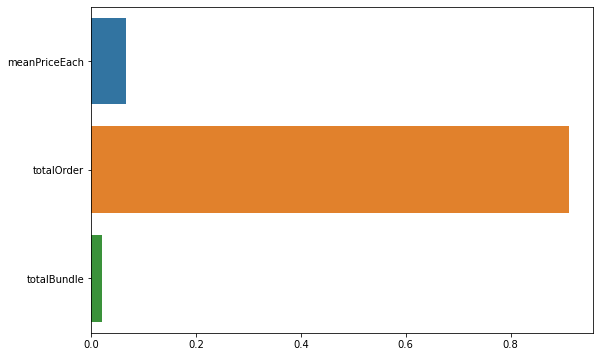

In [285]:
plt.figure(figsize = (9,6))
sns.barplot(Model_pr.feature_importances_,
            ['meanPriceEach', 'totalOrder', 'totalBundle'])
plt.show()